# Radar Implementation

In [1]:
import os 
import sys 
import numpy as np

sys.path.append("/Users/bobaebak/git/ai_text_detection")

In [2]:
from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

In [3]:
import transformers
import torch
import torch.nn.functional as F
import numpy as np
import random

In [4]:
device = "mps" # example: cuda:0
detector_path_or_id = "TrustSafeAI/RADAR-Vicuna-7B"
detector = transformers.AutoModelForSequenceClassification.from_pretrained(detector_path_or_id)
tokenizer = transformers.AutoTokenizer.from_pretrained(detector_path_or_id)
detector.eval()
detector.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [5]:
H_texts = load_json_list("../data/student_answers.json")
M_texts = load_json_list("../data/gpt_ai_answers.json")

In [10]:
#### human with student answer (batch)

Text_input = [item['raw'] for item in H_texts]
H_probs = []

for idx in range(int(len(Text_input)/16)):
  search = Text_input[idx*16:(idx+1)*16]
  with torch.no_grad():
    inputs = tokenizer(search, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {k:v.to(device) for k,v in inputs.items()}
    output_probs = F.log_softmax(detector(**inputs).logits,-1)[:,0].exp().tolist()
  # output_probs is the probability that the input_text is generated by LLM.
  print("There are",len(search),"input instances")
  print("Probability of AI-generated texts is",output_probs)
  for prob in output_probs:
    H_probs.append(prob)
  human_preds=output_probs


There are 16 input instances
Probability of AI-generated texts is [0.9983295798301697, 0.9989868998527527, 0.9951016902923584, 0.9975947737693787, 0.9991745352745056, 0.9927312731742859, 0.9877924919128418, 0.9996877312660217, 0.20521801710128784, 0.9995236396789551, 0.9992497563362122, 0.9871688485145569, 0.9948183298110962, 0.997668981552124, 0.5140407085418701, 0.9996370673179626]
There are 16 input instances
Probability of AI-generated texts is [0.9990498423576355, 0.9974244832992554, 0.9989871382713318, 0.9968700408935547, 0.9993854761123657, 0.9987450838088989, 0.8901142477989197, 0.9929261803627014, 0.9738361239433289, 0.994215726852417, 0.9994118809700012, 0.9714052677154541, 0.9926780462265015, 0.9980987906455994, 0.9955494999885559, 0.9743903875350952]
There are 16 input instances
Probability of AI-generated texts is [0.5349223017692566, 0.9913734197616577, 0.9579911828041077, 0.9991794228553772, 0.999096155166626, 0.9994885325431824, 0.9854584336280823, 0.9996111392974854, 0

In [14]:
#### human with student answer 

Human_texts = [
  '12 Years a Slave: An Analysis of the Film Essay\n\nThe 2013 film 12 Years a Slave proved that slavery is a worldwide issue. Indeed, the film made $150 million outside the United States and $57 million in the U.S., with a production budget of $20 million (Sharf, 2020). The movie was based on the memoir Twelve Years a Slave by Solomon Northup (Ntim, 2020). It tells the story of a free African American man who was kidnapped and sold into slavery. Solomon spent twelve years away from his family, being traded from one master to another. Fortunately, the protagonist met a person who helped him deliver a message to his family and friends, who came and rescued him. This movie accurately illustrates discriminatory relationships between white slaveholders and black slaves that stemmed from the dysfunctional system in the country and prejudices in people’s mindsets at that time.\n\nThe two main ethnic groups presented in this film are White and African Americans, and the three social groups are affluent slaveholders, working for middle class, and enslaved people. The movie starts with the story of a free African American violinist Solomon Northup, living with his family in Saratoga, New York (McQueen, 2013). However, he was abducted by two white men, who tortured the man and sold him into slavery, changing his name to Plat. Before they met, Solomon and these two slave traders belonged to the same middle class. However, the fact that Northup was an African American made these individuals believe that they had the right to withdraw their freedom. The two masters that Solomon had were William Ford and Edwin Epps (McQueen, 2013). The former was kind and religious, while the latter was cruel and sadistic. Since the movie was based on a real story, it indicated that slaveholders had different characters, but all had the wrong perception of race.\n\nAlthough 12 Years a Slave is a film about slavery, the issues of collectivism and individualism are also raised. Specifically, the main character never identified himself as an enslaved man and continued claiming he was a free citizen (McQueen, 2013). However, his counterparts on the plant had a collective mindset, imprinted in them since childhood, that slavery is normal. These people helped each other because they belonged to the same group. Although Solomon tried to become a part of this community, his individual goal to return home was above the collective values.\n\nThe movie also showed prejudice, generalizations, stereotyping, and discrimination against black people. For instance, when Ford brings Solomon and Elisa to his plantation, his wife expresses her sadness that Elisa got separated from her children. However, she also stated that “something to eat and some rest” could help that woman forget her children (McQueen, 2013, 32:47-32:51). This scene demonstrated the common prejudice about slaves that they were not capable of the same feelings as white people. An example of generalization and stereotyping was how Tibeats, a carpenter, became hostile to Solomon when he showed his intelligence and gave Ford advice. In fact, Tibeats believed that Plat would never be more competent than any white individual because Plat was a “nigger” (McQueen, 2013, 36:35-36:37). Notably, before Northup became enslaved, he never experienced discrimination, but when the main character was sold into slavery, discrimination was the only attitude that he could observe.\n\nIn summary, 12 Years a Slave depicts the life of enslaved people and slave owners almost two centuries ago. The film narrates a free black man’s life from the moment when he enjoyed his family’s company in the state of New York to his abduction, enslavement, and eventual liberation. Overall, the movie raised such critical issues as discrimination, prejudice, stereotyping, and generalization that allowed slaveholders to maintain this societal structure for a long time.\n\nReferences\n\nMcQueen, S. (2013). 12 years a slave [Film]. New Regency Productions.\n\nNtim, Z. (2020). Steve McQueen says it took 11 years to create his new anthology “Small Axe” and reveals why producers almost pulled out of his Oscar-winning film “12 Years a Slave.” Insider.\n\nSharf, Z. (2020). Steve McQueen recalls producers rejecting “12 Years a Slave” over false beliefs about black films. Indie Wire.\n',
  '20+ Social Media Post Ideas to Radically Simplify Your Marketing Essay\n\nSocial Media Examiner’s (2021) video on social media initiatives was most useful to me since it provides more than twenty social media post ideas to improve the marketing of any business. This source demonstrates that social media, namely Facebook Business and Instagram, have great power and enhance marketing, promoting organizations through posts, stories, hashtags, and user-generated content. The most useful information to me was about trends, pros and cons, comparison, direct offer, and long-form content.\n\nEffective change leadership is important when an organization wants to adopt social media initiatives. A good leader is associated with effective communication, for example, written content on social media. For example, a leader may encourage customers to generate content by creating a hashtag, like #MyInstagramLogo, and inquiring them to share their views on the logo or any other product or service the company offers (They Ask, You Answer, 2018). Leaders should clarify their vision and ensure that everyone understands them. They should lead their employees in the right direction, inspiring them to change.\n\nI may encounter the following ethical issues: over-promising, under-delivering, and overstated statements. I would try to provide my customers with honest information about the business and stop making everyone happy to address the first issue. Over-promising can make clients disappointed and lead to their negative feedback. Therefore, it is better to follow ethical principles and make promises only if they can be 100% fulfilled. To address the second issue, I would try to be transparent and honest about the content. If the company claims to deliver products from one country to another in three days, it will need to fulfill it. Otherwise, it will be lying to the clients, thus losing its credibility. These strategies will help me address the above-mentioned ethical issues because honesty and transparency are always valued, and they help attract new customers and make the old customers stay with the company they trust.\n\nReferences\n\nSocial Media Examiner. (2021). 20+ social media post ideas to radically simplify your marketing [Video]. YouTube. Web.\n\nThey Ask, You Answer taught by IMPACT. (2018). 5 social media campaign examples from big brands you want to be [Video]. YouTube. Web.\n',
  '2022 Russian Invasion of Ukraine in Global Media Coverage Essay (Critical Writing)\n\nThe world has been shattered by Russia’s attack on Ukraine in the past few days. Ukraine’s forces have put up remarkable resistance to this attack, but the war is entering an even bloodier phase. Europe could be witnessing the first major military invasion in years. Many people have been displaced, and many Ukrainian citizens have fled neighboring countries for peace. Gunshots and artillery fires have been raining down on residential areas in Ukraine, with several media houses and newspapers reporting the events and sharing the news with the rest of the world.\n\nVarious newspapers have reported the news differently, with the difference seen in headlines, videos and images posted. The two newspapers covering the events in Ukraine are the New York Times and Le Monde, a French newspaper. While New York Times and Le Monde report the same event, the two use very different terms to describe similar activities. In the recent takeover of the city of Kharkiv by the Russian forces, for example, the NYT headline read “Russian Troops Take Over Kharkiv,” Le Monde , on the other hand, read “La Russie A Envahi Kharkiv” to mean “Russia Has Invaded Kharkiv.” Recently a video of Ukrainian citizens making Molotov cocktail Petrol bombs was shared. The headline in NYT read, “Ukraine Prepare Molotov Cocktail In Kyiv.” Le Monde ‘s headline read “Ukrainian Resistance Using Molotov Bombs.” Because headlines are the deciding factor for people to read an article, newspapers make them enticing. The New York Times uses headlines that suggest this is another world war, while Le Monde downplays the illegality of what Russia is doing. The differences seen in the headlines of the two newspapers are all for the attraction of their audiences; each magazine writes eye-catching unique topics.\n',
  '533 U.S. 27 (2001) Kyllo v. United States: The Use of a Thermal Imaging Device Report\n\nTable of Contents\n 1. Facts\n 2. Issue\n 3. Holding\n 4. Reasoning\n 5. Reference\n\nFacts\n\nThe parties to the selected lawsuit are Agent Elliott and the petitioner Danny Kyllo, and the court initiated in Florence, Oregon. The United States Department of the Interior’s agent used the thermal imaging device to prove their suspicions that Kyllo grows marijuana indoors (Kyllo v. United States, 2001). Plants require consistent heating, and the fact that one wall was significantly warmer than others, according to the scanner, determined the course of further investigation. The agent received a warrant authorizing a search of Kyllo’s house, and the plantation was found there. The defendant pleaded guilty in violation of 21 U. S. C. § 841(a)(1); however, the dispute occurred as the appeal stated that using the thermal imaging scan on an individual’s house violates the Fourth Amendment (Kyllo v. United States, 2001). The Court of Appeals for the Ninth Circuit was required to revise the warrant’s validity based on the imaging made by Elliott. On remand, the court concluded that using a scanning device was appropriate because it did not expose any private life or human activities inside the house (Kyllo v. United States, 2001). Furthermore, the defendant had no intention to hide the use of heating; thus, their privacy was not violated.\n\nIssue\n\nWas the use of a thermal imaging device considered a search under the Fourth Amendment to the United States Constitution?\n\nHolding\n\nYes.\n\nReasoning\n\nThe final outcome was on the side of the Supreme Court, which reversed the appellation, and further proceedings concluded that scanning the house and retrieving the information about its internal parts was a search. The technology of the thermal imaging device is not used publicly and considered unreasonable; therefore, the agent was not allowed to perform it without a warrant (Kyllo v. United States, 2001). The court of the first instance was incorrect regarding the evidence approval, and the case’s reasoning forced the regulators to revise the use of technology during investigations in terms of individuals’ privacy protection. The Supreme Court had passed no significant law enforcement related to the use of technology and surveillance.\n\nReference\n\nKyllo v. United States, 533 U.S. 27, 121 S. Ct. 2038. (2001). Web.\n',

    # "Maj Richard Scott, 40, is accused of driving at speeds of up to 95mph (153km/h) in bad weather before the smash on a B-road in Wiltshire. Gareth Hicks, 24, suffered fatal injuries when the van he was asleep in was hit by Mr Scott's Audi A6. Maj Scott denies a charge of causing death by careless driving. Prosecutor Charles Gabb alleged the defendant, from Green Lane in Shepperton, Surrey, had crossed the carriageway of the 60mph-limit B390 in Shrewton near Amesbury. The weather was \"awful\" and there was strong wind and rain, he told jurors. He said Mr Scott's car was described as \"twitching\" and \"may have been aquaplaning\" before striking the first vehicle; a BMW driven by Craig Reed. Mr Scott's Audi then returned to his side of the road but crossed the carriageway again before colliding",
    # "Solar concentrating technologies such as parabolic dish, trough and Scheffler reflectors can provide process heat for commercial and industrial applications. The first commercial system was the Solar Total Energy Project (STEP) in Shenandoah, Georgia, USA where a field of 114 parabolic dishes provided 50% of the process heating, air conditioning and electrical requirements for a clothing factory. This grid-connected cogeneration system provided 400 kW of electricity plus thermal energy in the form of 401 kW steam and 468 kW chilled water, and had a one-hour peak load thermal storage. Evaporation ponds are shallow pools that concentrate dissolved solids through evaporation. The use of evaporation ponds to obtain salt from sea water is one of the oldest applications of solar energy. Modern uses include concentrating brine solutions used in leach mining and removing dissolved solids from waste",
    # "The Bush administration then turned its attention to Iraq, and argued the need to remove Saddam Hussein from power in Iraq had become urgent. Among the stated reasons were that Saddam's regime had tried to acquire nuclear material and had not properly accounted for biological and chemical material it was known to have previously possessed, and believed to still maintain. Both the possession of these weapons of mass destruction (WMD), and the failure to account for them, would violate the U.N. sanctions. The assertion about WMD was hotly advanced by the Bush administration from the beginning, but other major powers including China, France, Germany, and Russia remained unconvinced that Iraq was a threat and refused to allow passage of a UN Security Council resolution to authorize the use of force. Iraq permitted UN weapon inspectors in November 2002, who were continuing their work to assess the WMD claim when the Bush administration decided to proceed with war without UN authorization and told the inspectors to leave the"
] # you should replace the human texts with the text in your human corpus
Text_input = Human_texts
# Use detector to deternine wehther the text_input is ai-generated.
with torch.no_grad():
  inputs = tokenizer(Text_input, padding=True, truncation=True, max_length=512, return_tensors="pt")
  inputs = {k:v.to(device) for k,v in inputs.items()}
  output_probs = F.log_softmax(detector(**inputs).logits,-1)[:,0].exp().tolist()
# output_probs is the probability that the input_text is generated by LLM.
print("There are",len(Text_input),"input instances")
print("Probability of AI-generated texts is",output_probs)
human_preds=output_probs


There are 4 input instances
Probability of AI-generated texts is [0.1829250007867813, 0.6921366453170776, 0.5348039865493774, 0.154791921377182]


In [9]:
H_probs

[]

In [7]:
#### ai 

Text_input = [item['raw'] for item in M_texts]
M_probs = []

for idx in range(int(len(Text_input)/16)):
  search = Text_input[idx*16:(idx+1)*16]
  with torch.no_grad():
    inputs = tokenizer(search, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {k:v.to(device) for k,v in inputs.items()}
    output_probs = F.log_softmax(detector(**inputs).logits,-1)[:,0].exp().tolist()
  # output_probs is the probability that the input_text is generated by LLM.
  print("There are",len(search),"input instances")
  print("Probability of AI-generated texts is",output_probs)
  for prob in output_probs:
    M_probs.append(prob)
  human_preds=output_probs


There are 16 input instances
Probability of AI-generated texts is [0.9945954084396362, 0.9993690252304077, 0.9989537596702576, 0.9991137385368347, 0.9990455508232117, 0.999521791934967, 0.9901681542396545, 0.9995376467704773, 0.9980800151824951, 0.9995747208595276, 0.9995194673538208, 0.9994451403617859, 0.9993560314178467, 0.9995896220207214, 0.9646524786949158, 0.9995173215866089]
There are 16 input instances
Probability of AI-generated texts is [0.9987499713897705, 0.9992077350616455, 0.9989438056945801, 0.9994312524795532, 0.9994621872901917, 0.9995990991592407, 0.9990707635879517, 0.9994889497756958, 0.9950196743011475, 0.9992129802703857, 0.9996464848518372, 0.9985001683235168, 0.9991378784179688, 0.9973823428153992, 0.9993596076965332, 0.9983038902282715]
There are 16 input instances
Probability of AI-generated texts is [0.9894871711730957, 0.9991013407707214, 0.9977661371231079, 0.9989960789680481, 0.9992492198944092, 0.9987791180610657, 0.9981695413589478, 0.9993807673454285, 

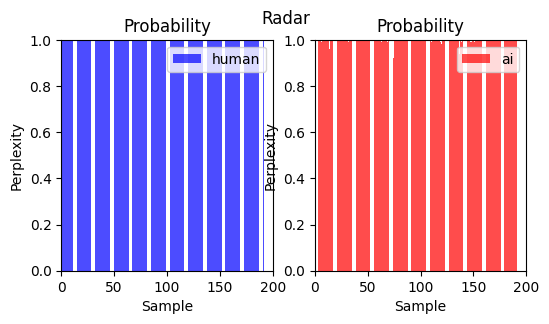

In [32]:
#### Histogram 

helper = PlotHelper(
    row=1, col=2, figsize=(6,3), title="Radar",
    plots=[
        PlotItem(ptype="plot", title="Probability", 
                 xlabel="Sample", ylabel="Perplexity", xlim=(0, 200), ylim=(0, 1),
                 y=[[round(data, 2) for data in H_probs]],
                 x=[[human for human in range(len(H_probs))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, ]
        ),

        PlotItem(ptype="plot", title="Probability", 
                 xlabel="Sample", ylabel="Perplexity", xlim=(0, 200), ylim=(0, 1),
                 y=[[round(data, 2) for data in M_probs]],
                 x=[[ai for ai in range(len(M_probs))]],
                 args=[{"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        
        # PlotItem(ptype="bar", title="Burstiness", 
        #          xlabel="Sample", ylabel="Burstiness", xlim=(0, 200), ylim=(0, 3000),
        #          y=[[human[2] for human in human_analysis]],
        #          x=[[human for human in range(len(human_analysis))]],
        #          args=[{ "color":"blue", "alpha":0.7, "label": "human"}, ]
        # ),
        # PlotItem(ptype="bar", title="Burstiness", 
        #          xlabel="Sample", ylabel="Burstiness", xlim=(0, 200), ylim=(0, 3000),
        #          y=[[ai[2] for ai in ai_analysis]],
        #          x=[[ai for ai in range(len(ai_analysis))]],
        #          args=[{"color":"red", "alpha":0.7, "label": "ai"},]
        # ),
    ]
)


draws(helper)    

In [28]:
# try on generic of dataset 
from datasets import load_dataset

dataset = load_dataset("qwedsacf/ivypanda-essays")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [34]:
len(dataset['train']['TEXT'][:200])

200

In [43]:
#### human with student answer

Text_input = dataset['train']['TEXT'][:1000]
H_probs = []

for idx in range(int(len(Text_input)/16)):
  search = Text_input[idx*16:(idx+1)*16]
  with torch.no_grad():
    inputs = tokenizer(search, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {k:v.to(device) for k,v in inputs.items()}
    output_probs = F.log_softmax(detector(**inputs).logits,-1)[:,0].exp().tolist()
  # output_probs is the probability that the input_text is generated by LLM.
  print("There are",len(search),"input instances")
  print("Probability of AI-generated texts is",output_probs)
  for prob in output_probs:
    H_probs.append(prob)
  human_preds=output_probs


There are 16 input instances
Probability of AI-generated texts is [0.18292492628097534, 0.6921366453170776, 0.5348039865493774, 0.15479198098182678, 0.20206856727600098, 0.124354787170887, 0.351680725812912, 0.4770083725452423, 0.25885912775993347, 0.3428531587123871, 0.5063346028327942, 0.14718811213970184, 0.4094156324863434, 0.21775411069393158, 0.3075110912322998, 0.09326338022947311]
There are 16 input instances
Probability of AI-generated texts is [0.16912654042243958, 0.7377366423606873, 0.03585764020681381, 0.2997959852218628, 0.02934735082089901, 0.04728323593735695, 0.7564877271652222, 0.36979371309280396, 0.48556703329086304, 0.608946681022644, 0.04016568884253502, 0.5927954912185669, 0.414109468460083, 0.44808635115623474, 0.8214284777641296, 0.3803045153617859]
There are 16 input instances
Probability of AI-generated texts is [0.12092718482017517, 0.10954978317022324, 0.2585293650627136, 0.28616154193878174, 0.6528719663619995, 0.07723050564527512, 0.22509978711605072, 0.1

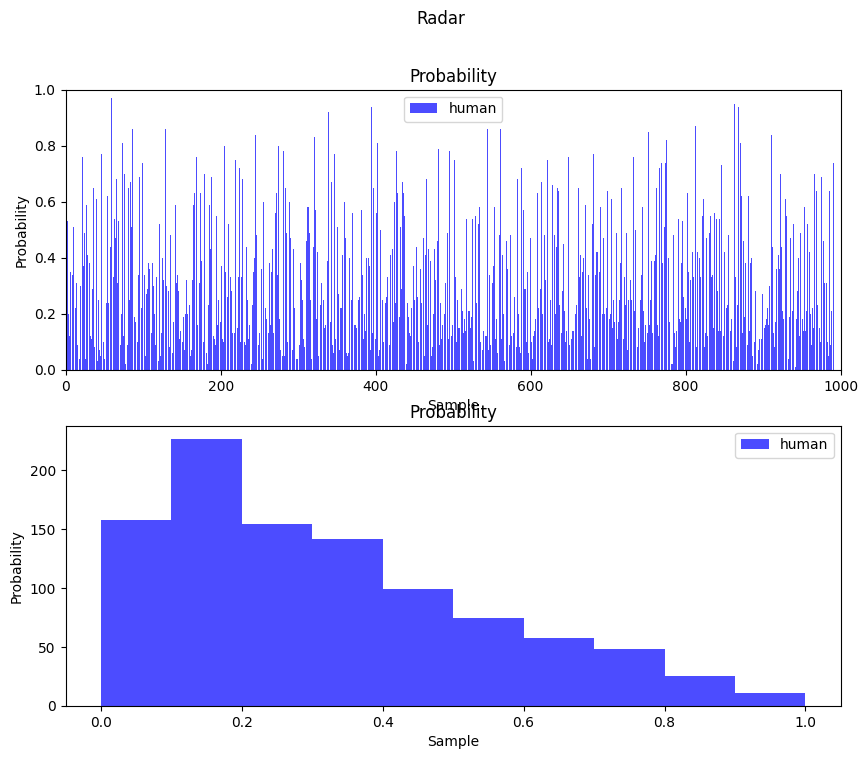

In [53]:
#### Histogram 

helper = PlotHelper(
    row=2, col=1, figsize=(10,8), title="Radar",
    plots=[
        PlotItem(ptype="bar", title="Probability", 
                 xlabel="Sample", ylabel="Probability", xlim=(0, 1000), ylim=(0, 1),
                 y=[[round(data, 2) for data in H_probs]],
                 x=[[human for human in range(len(H_probs))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, ]
        ),

        PlotItem(ptype="hist", title="Probability", 
                 xlabel="Sample", ylabel="Frequency", 
                 x=[H_probs],
                 args=[{"bins":np.linspace(0, 1, 11), "color":"blue", "alpha":0.7, "label": "human"},]
        ),
        
    ]
)

draws(helper)    

In [45]:
np.mean(H_probs)



0.3213523889576355

In [49]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])